# Data Preparation
Setting up libraries and installing packages

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

I accessed the NYC OpenData Motor Vehicle Collisions dataset, which included information on motor vehicle crashes reported by the police in New York City. Each entry in the dataset represented a separate crash event.

Since this is a large dataset,I uploading it by mounting my Google Drive for easier access.

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Motor_Vehicle_Collisions_-_Crashes_20240828.csv")

<ipython-input-4-64fc793d70c6>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/content/drive/MyDrive/Motor_Vehicle_Collisions_-_Crashes_20240828.csv")


In [ ]:
data.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,09/11/2021,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,12/14/2021,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN


In [ ]:
desc_stats = data.describe()
desc_stats

,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,COLLISION_ID
count,1.871609e+06,1.871609e+06,2.114125e+06,2.114112e+06,2.114143e+06,2.114143e+06,2.114143e+06,2.114143e+06,2.114143e+06,2.114143e+06,2.114143e+06
mean,4.062277e+01,-7.374315e+01,3.151772e-01,1.524044e-03,5.716548e-02,7.525508e-04,2.744989e-02,1.182512e-04,2.265977e-01,6.295695e-04,3.188410e+06
std,2.030002e+00,3.807931e+00,7.048770e-01,4.121442e-02,2.452719e-01,2.800266e-02,1.654616e-01,1.091711e-02,6.661412e-01,2.742544e-02,1.506121e+06
min,0.000000e+00,-2.013600e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.200000e+01
25%,4.066768e+01,-7.397479e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.164656e+06
50%,4.072065e+01,-7.392717e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.693328e+06
75%,4.076963e+01,-7.386673e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.222100e+06
max,4.334444e+01,0.000000e+00,4.300000e+01,8.000000e+00,2.700000e+01,6.000000e+00,4.000000e+00,2.000000e+00,4.300000e+01,5.000000e+00,4.750874e+06


The information above is currently formatted in scientific notation.
1. Latitude & Longitude: The latitude and longitude indicate where the crashes are occurring. However, there are some data points with latitude and longitude values of 0, which is likely due to missing or inaccurate data.

2. Number of Persons Injured: On average, each crash has around 0.305 injuries. The maximum number of injuries in a single crash is 43.

3. Number of Persons Killed: Fatalities are rare, with an average of 0.00146 deaths per crash. The maximum number of deaths in one crash is 8.

4. Number of Pedestrians, Cyclists, and Motorists Injured/Killed: These columns provide a breakdown of the injuries and fatalities by type of individual involved.

5. Collision ID: This is a unique identifier for each crash.

# Pre-Processing and Exploration

The main goal of this is to assess the dataset, find missing values, and decide what to do with those missing data points.

In [ ]:
missing_values = data.isnull().sum()
missing_values_percentage = (missing_values / len(data)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage (%)': missing_values_percentage})
missing_data.sort_values(by='Percentage (%)', ascending=False)

,Missing Values,Percentage (%)
VEHICLE TYPE CODE 5,2105080,99.571316
CONTRIBUTING FACTOR VEHICLE 5,2104795,99.557835
VEHICLE TYPE CODE 4,2080963,98.430570
CONTRIBUTING FACTOR VEHICLE 4,2079749,98.373147
VEHICLE TYPE CODE 3,1968018,93.088216
CONTRIBUTING FACTOR VEHICLE 3,1962367,92.820921
OFF STREET NAME,1754781,83.002001
CROSS STREET NAME,804235,38.040710
ZIP CODE,657892,31.118614
BOROUGH,657632,31.106316


Here's an overview of the missing values in the dataset:

Columns like VEHICLE TYPE CODE 5, CONTRIBUTING FACTOR VEHICLE 5, VEHICLE TYPE CODE 4, and so on have a high percentage of missing values. This is expected since not all crashes involve multiple vehicles or factors.

OFF STREET NAME and CROSS STREET NAME have significant missing values. This could be due to crashes occurring in locations where these details aren't applicable or weren't recorded.

ZIP CODE, BOROUGH, and ON STREET NAME also have missing values. This might be due to incomplete data entry or crashes occurring in areas where these specifics aren't easily determinable.

LOCATION, LATITUDE, and LONGITUDE have the same count of missing values, indicating that when one is missing, the others are likely missing as well.

**Create a bar chart to display the top 10 contributing factors (e.g. backing up unsafely, unsafe lane changing, etc.) to crashes within the dataset.**

<ipython-input-10-af82d403813e>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_factors.index, y=top_factors.values, palette="magma")


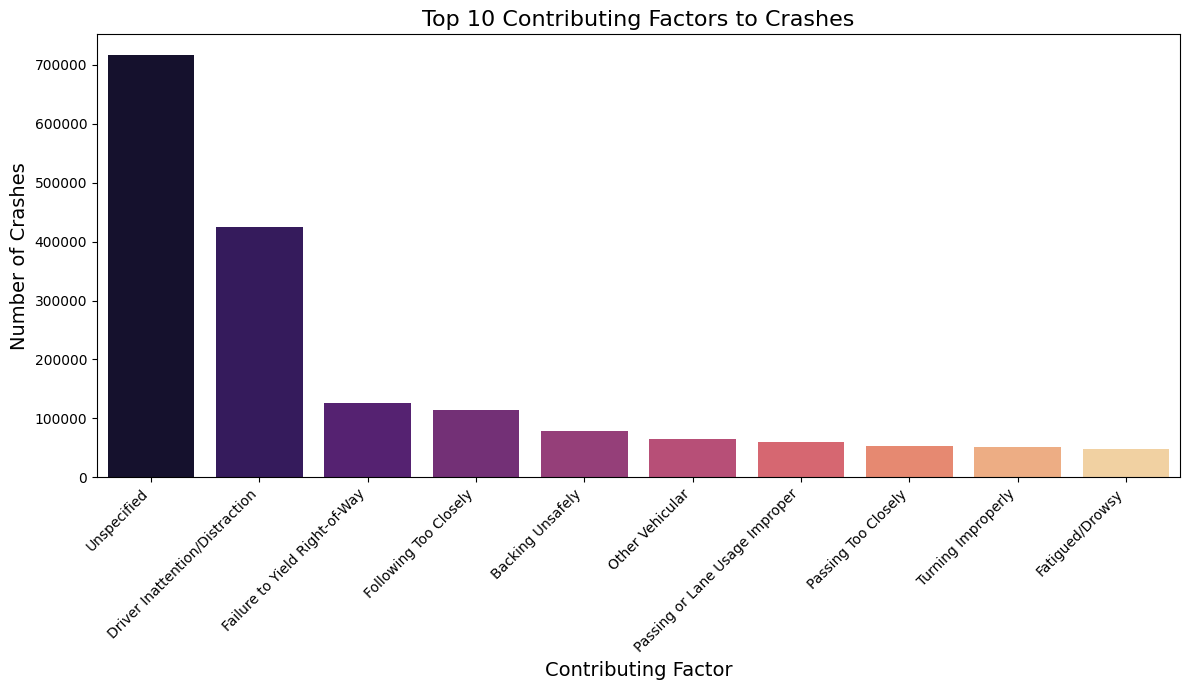

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

top_factors = data['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().head(10)

plt.figure(figsize=(12, 7))
# TODO: Plotting the top contributing factors, fill in x as the index field of the variable 'top_factors'
sns.barplot(x=top_factors.index, y=top_factors.values, palette="magma")
plt.title('Top 10 Contributing Factors to Crashes', fontsize=16)
plt.xlabel('Contributing Factor', fontsize=14)
plt.ylabel('Number of Crashes', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**Based on the bar chart showing the top 10 contributing factors to crashes, here are some recommendations for new and current drivers:**

Avoid Distractions While Driving: The second most common contributing factor is "Driver Inattention/Distraction." It's crucial to stay focused on the road at all times. Avoid using mobile phones, adjusting the radio, or engaging in activities that divert your attention from driving.

Be Vigilant About Yielding the Right-of-Way: "Failure to Yield Right-of-Way" is another significant factor in crashes. Always be aware of traffic rules regarding right-of-way, and be cautious at intersections and pedestrian crossings.

Maintain a Safe Following Distance: "Following Too Closely" is a notable cause of accidents. Drivers should keep a safe distance from the vehicle in front, allowing enough time to react if the vehicle suddenly stops.

Practice Safe Reversing Techniques: "Backing Unsafely" also contributes to a number of crashes. When reversing, always check your mirrors, look over your shoulder, and proceed slowly.

Ensure Proper Lane Usage: Improper lane usage and passing are common factors in crashes. Make sure to use lanes correctly, signal before changing lanes, and only pass when it's safe and legal.

Be Aware of Fatigue: Although less common, "Fatigued/Drowsy Driving" is still a concern. Ensure you are well-rested before driving and take breaks during long trips to avoid drowsiness.

By addressing these key factors, drivers can significantly reduce their risk of being involved in a crash. Safe driving habits are essential for preventing accidents and ensuring the safety of everyone on the road.

<ipython-input-11-b18517f996fc>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_vehicle_types.index, y=top_vehicle_types.values, palette="cividis")


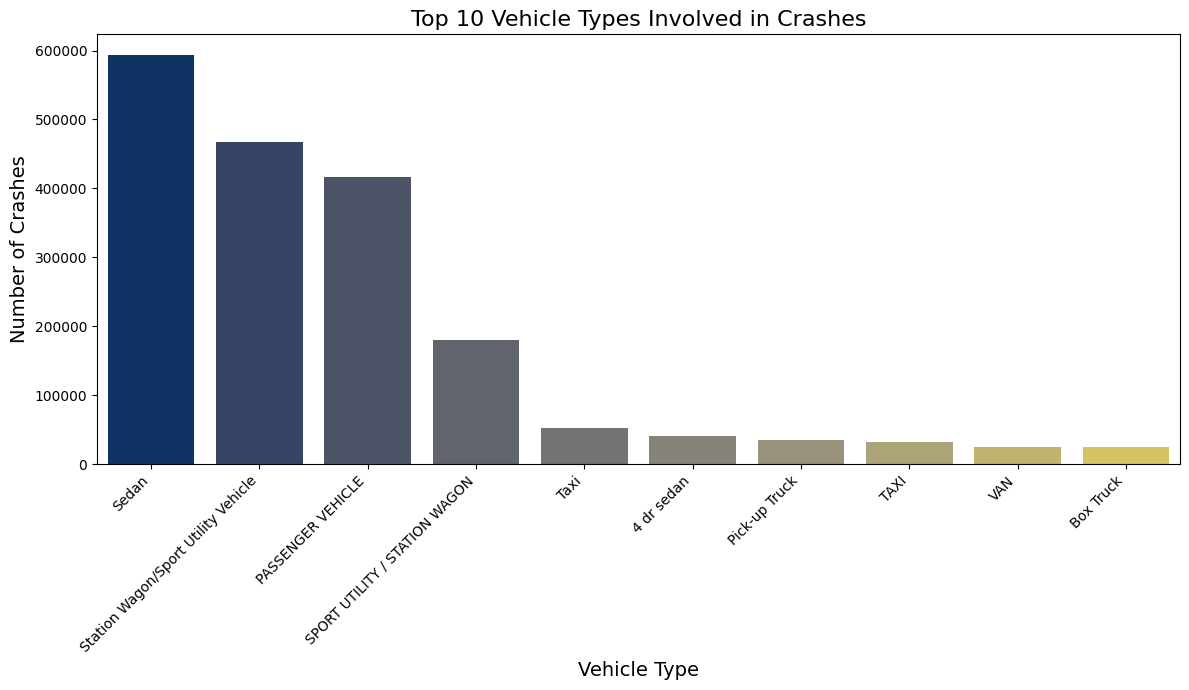

In [ ]:
# Determine the top vehicle types involved in crashes
top_vehicle_types = data['VEHICLE TYPE CODE 1'].value_counts().head(10)

# Plotting the top vehicle types
plt.figure(figsize=(12, 7))
sns.barplot(x=top_vehicle_types.index, y=top_vehicle_types.values, palette="cividis")
plt.title('Top 10 Vehicle Types Involved in Crashes', fontsize=16)
plt.xlabel('Vehicle Type', fontsize=14)
plt.ylabel('Number of Crashes', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Based on the bar chart provided, "Sedans," "Station Wagons/Sport Utility Vehicles," and "Passenger Vehicles" are involved in a larger number of crashes, injuries, and deaths compared to other vehicle types. Several reasons might explain this trend:

Higher Prevalence on the Road: Sedans, station wagons, and passenger vehicles are among the most common types of vehicles used for personal transportation. Their higher numbers on the road naturally lead to a higher incidence of crashes involving these types of vehicles.

Versatility and Usage Patterns: These vehicle types are often used for various purposes, including daily commuting, long-distance travel, and family transportation. The more time a vehicle spends on the road, the higher the likelihood of it being involved in a crash.

Urban Driving: Sedans and passenger vehicles are popular choices in urban environments, where traffic density is high. The higher frequency of stop-and-go traffic, intersections, and pedestrian activity in cities increases the chances of accidents.

Driver Demographics: Sedans and passenger vehicles are often the preferred choice for a broad demographic, including new and inexperienced drivers, who might be more prone to accidents. Additionally, they are often used by families with children, which can lead to distractions while driving.

Affordability: Sedans are typically more affordable and thus more accessible to a larger population. This affordability contributes to their popularity, which in turn increases their involvement in crashes simply due to the sheer number of them on the road.

Insurance and Risk-Taking Behavior: Some drivers may feel more comfortable taking risks in a vehicle they perceive as safer or more affordable to repair, which could contribute to a higher rate of accidents involving these vehicle types.

In summary, the large number of crashes involving sedans, station wagons, and passenger vehicles is likely due to their widespread use, especially in urban settings, and their appeal to a broad and diverse group of drivers.

<ipython-input-12-843ffc253d64>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Crash Type', data=crash_types_df, palette="mako")


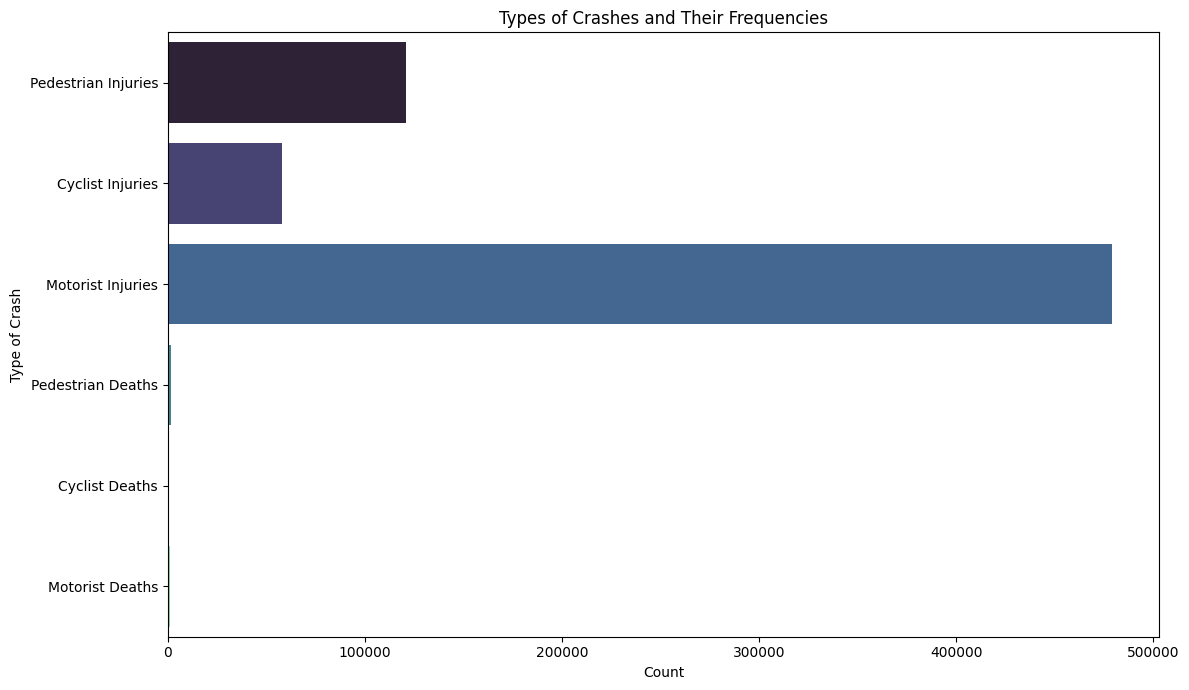

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Aggregating data - Complete for Cyclist and Motorist
types_of_crashes = {
    'Pedestrian Injuries': data['NUMBER OF PEDESTRIANS INJURED'].sum(),
    'Cyclist Injuries': data['NUMBER OF CYCLIST INJURED'].sum(),
    'Motorist Injuries': data['NUMBER OF MOTORIST INJURED'].sum(),
    'Pedestrian Deaths': data['NUMBER OF PEDESTRIANS KILLED'].sum(),
    'Cyclist Deaths': data['NUMBER OF CYCLIST KILLED'].sum(),
    'Motorist Deaths': data['NUMBER OF MOTORIST KILLED'].sum()
}

# Converting to DataFrame for easier plotting - we want the items in the dictionary, use the items function
crash_types_df = pd.DataFrame(list(types_of_crashes.items()), columns=['Crash Type', 'Count'])

# Plot
plt.figure(figsize=(12, 7))
sns.barplot(x='Count', y='Crash Type', data=crash_types_df, palette="mako")
plt.title('Types of Crashes and Their Frequencies')
plt.xlabel('Count')
plt.ylabel('Type of Crash')
plt.tight_layout()
plt.show()


# Time series Analysis
The main goal of this is to dive deeper into Time Series Analysis in order to better understand our data's trends over time.

created a chart that displays the average number of crashes per hour of the day. This will help us understand whether additional factors are contributing to crashes - i.e. rush hour, school dismissal time, night fall, etc.

<ipython-input-13-c8d07b03e5cd>:7: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)
<ipython-input-13-c8d07b03e5cd>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Hour of Day', y='Number of Crashes', data=average_crashes_df, palette="viridis")


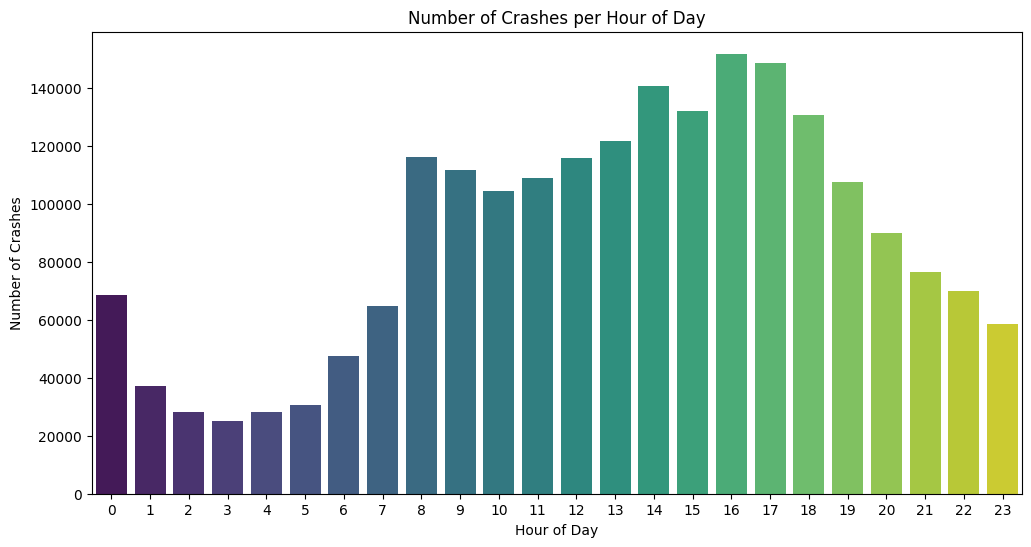

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the dataset
file_path = "/content/drive/MyDrive/Motor_Vehicle_Collisions_-_Crashes_20240828.csv"  # Replace with your actual file path
data = pd.read_csv(file_path)

# Convert 'CRASH DATE' and 'CRASH TIME' to datetime
data['CRASH DATE'] = pd.to_datetime(data['CRASH DATE'])
data['CRASH TIME'] = pd.to_datetime(data['CRASH TIME'], format='%H:%M')

# Time of Day Analysis
data['Hour of Day'] = data['CRASH TIME'].dt.hour

# Group by 'Hour of Day' and calculate the average number of crashes per hour
average_crashes_per_hour = data.groupby('Hour of Day').size()

# Convert to DataFrame for plotting
average_crashes_df = average_crashes_per_hour.reset_index(name='Number of Crashes')

# Plot the average number of crashes
plt.figure(figsize=(12, 6))
sns.barplot(x='Hour of Day', y='Number of Crashes', data=average_crashes_df, palette="viridis")
plt.title('Number of Crashes per Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Crashes')
plt.xticks(range(0, 24))
plt.show()


Based on the chart, the time of day that sees the most crashes is between 3:00 PM and 6:00 PM, with a peak around 4:00 PM to 5:00 PM.

Possible Reasons:
Rush Hour Traffic: This time period coincides with the evening rush hour when many people are leaving work and heading home. The increased number of vehicles on the road naturally leads to a higher likelihood of crashes.

Fatigue and Distraction: After a long day at work, drivers might be more fatigued or distracted, which can increase the chances of accidents. Mental and physical tiredness can lead to slower reaction times and reduced attention to driving.

Increased Stress Levels: The rush to get home, coupled with potential traffic congestion, can lead to increased stress and aggressive driving behaviors, such as tailgating, lane-changing, or speeding, all of which contribute to a higher risk of accidents.

Varied Road Users: This time of day also sees a mix of different road users—commuters, school buses, delivery vehicles, and pedestrians—all vying for space on the road. The increased interaction between different types of road users can lead to more conflicts and accidents.

Changing Light Conditions: Depending on the season, this time might also coincide with the setting sun, which can cause glare and reduce visibility, further increasing the risk of accidents.

These factors combined likely contribute to the higher number of crashes observed during the late afternoon and early evening hours.

Plotted a graph to determine how COVID-19 impacted the number of crashes per month, if at all

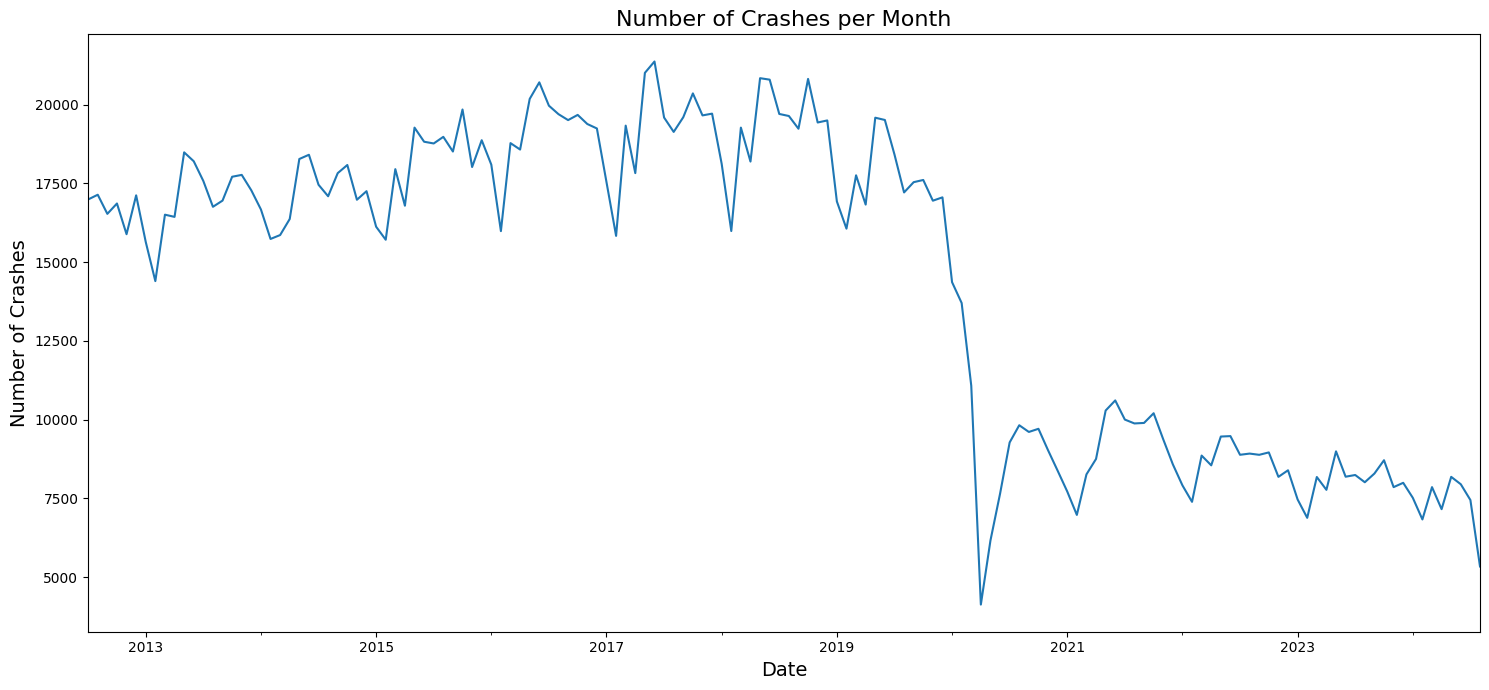

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert 'CRASH DATE' to datetime format
data['CRASH DATE'] = pd.to_datetime(data['CRASH DATE'])

# Group by month and year to get the number of crashes per month
monthly_crashes = data.groupby(data['CRASH DATE'].dt.to_period("M")).size()

# Plotting the trend over time
plt.figure(figsize=(15, 7))
monthly_crashes.plot()
plt.title('Number of Crashes per Month', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Crashes', fontsize=14)
plt.tight_layout()
plt.show()


**Apply time series decomposition to review trends, seasonality, and residuals.**

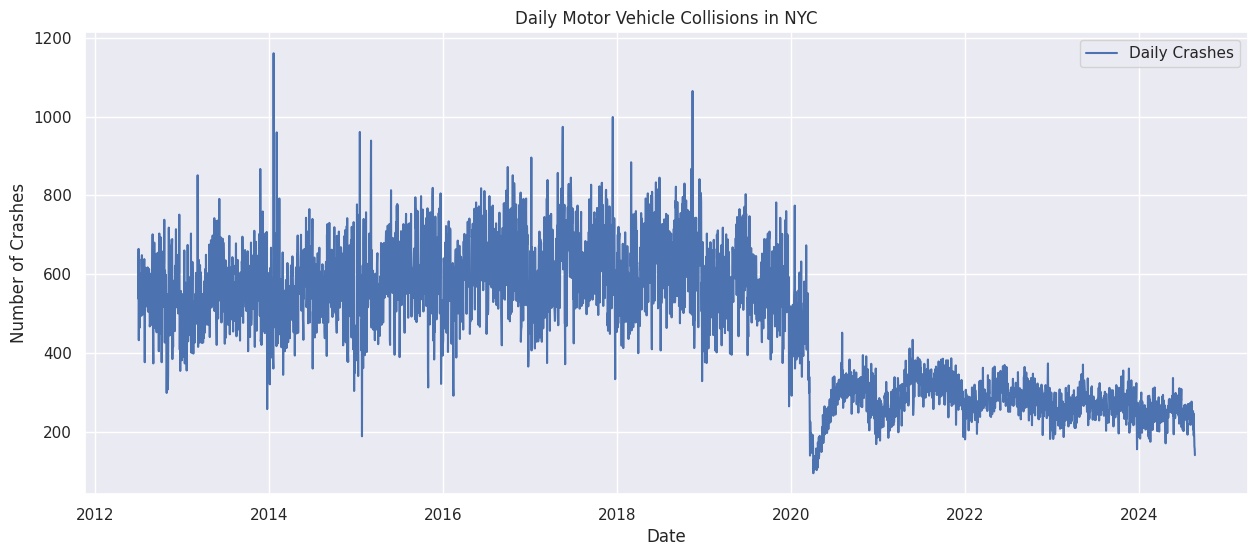

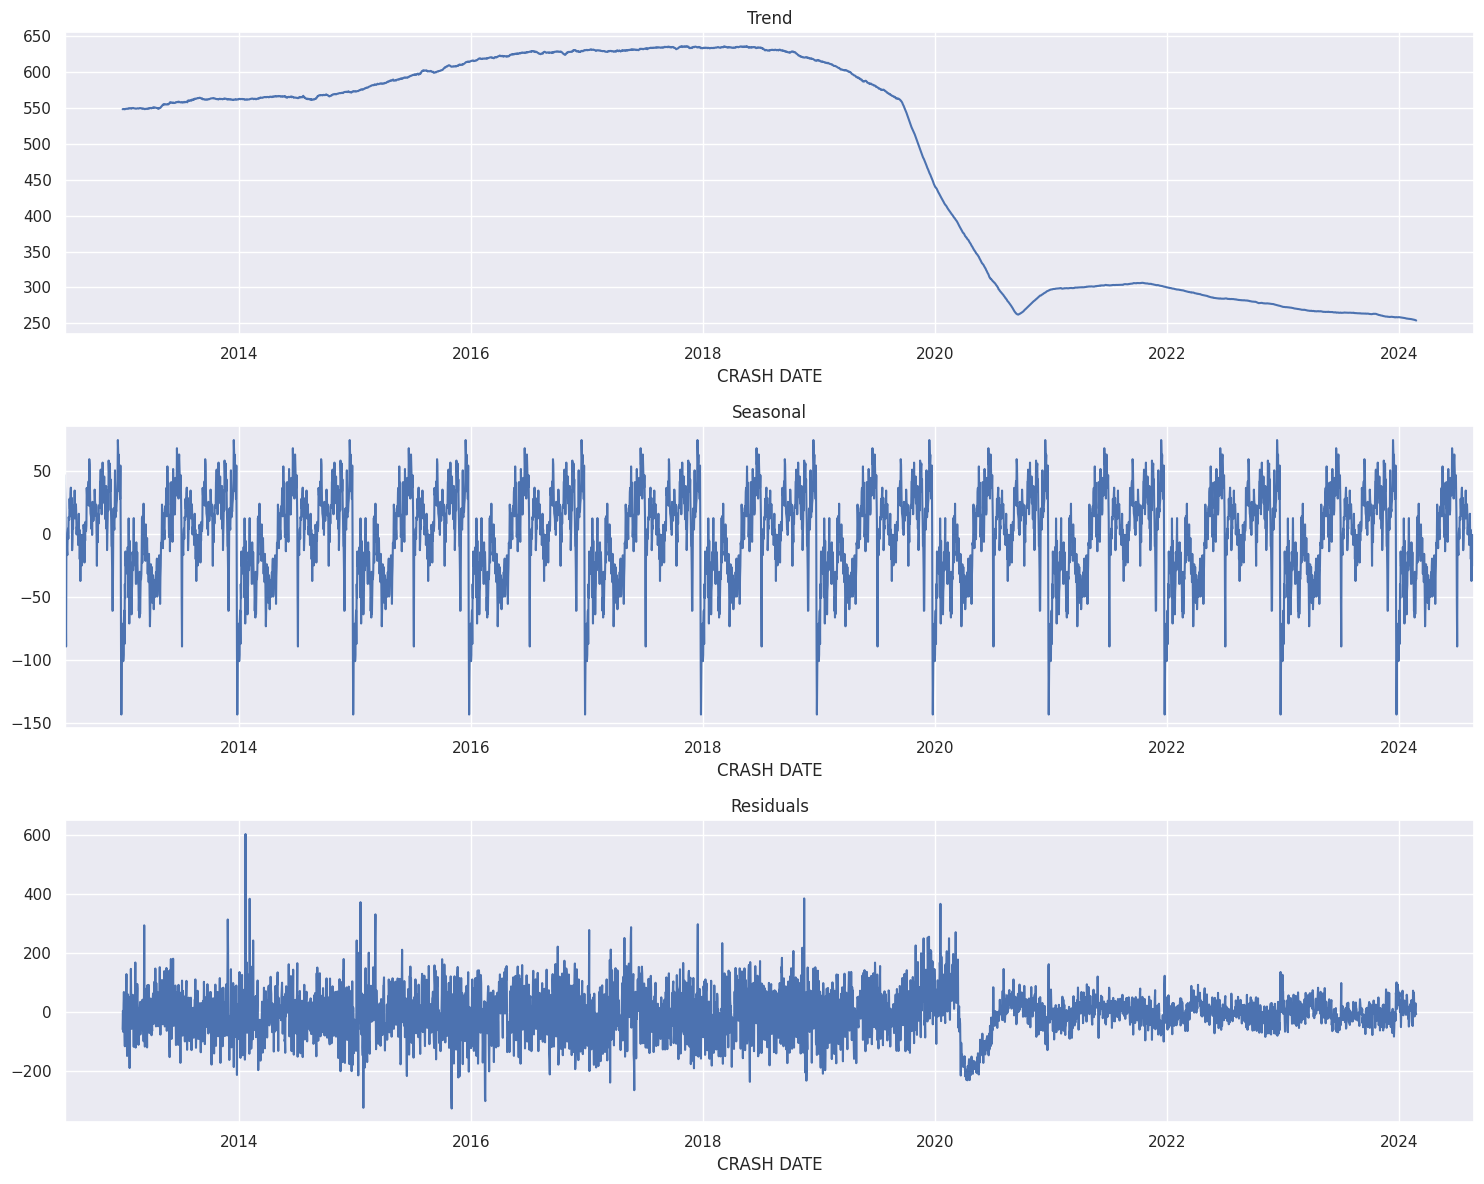

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# Count the number of crashes per day, group by CRASH DATE
daily_crashes = data.groupby('CRASH DATE').size()

# Set plot style
sns.set(style="darkgrid")

# Plot the daily crashes time series
plt.figure(figsize=(15, 6))
plt.plot(daily_crashes.index, daily_crashes.values, label='Daily Crashes')
plt.title('Daily Motor Vehicle Collisions in NYC')
plt.xlabel('Date')
plt.ylabel('Number of Crashes')
plt.legend()
plt.show()

# Decompose the time series
decomposition = seasonal_decompose(daily_crashes, model='additive', period=365)

# Plot the decomposed components
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 12))
decomposition.trend.plot(ax=ax1)
ax1.set_title('Trend')
decomposition.seasonal.plot(ax=ax2)
ax2.set_title('Seasonal')
decomposition.resid.plot(ax=ax3)
ax3.set_title('Residuals')
plt.tight_layout()
plt.show()


The visualizations above provide valuable insights into the time series of daily motor vehicle collisions in New York City:

Time Series Plot: This shows the number of daily crashes over time. You might observe long-term trends, seasonal patterns, or significant outliers.

Decomposed Components:

1. Trend: This graph shows the long-term trend in the data, which can indicate whether crashes are increasing, decreasing, or stable over time.

2. Seasonality: This reveals any regular patterns that repeat over a specific period, such as yearly. It helps identify times of the year with higher or lower crash frequencies.

3. Residuals: These are the irregular components that cannot be attributed to the trend or seasonality. They might include random or unpredictable fluctuations.

Analysis of the Trend Graph
Trend Between 2014 and 2022:

The trend graph shows a general increase in crashes from 2014 until around 2019, where it peaks.
From 2019 onwards, there is a noticeable and sharp decrease in the number of crashes that continues through 2020 and stabilizes at a lower level by 2021.
Therefore, between 2014 and 2022, the data indicates an increase in crashes up until 2019, followed by a decrease from 2019 to 2022.
Analysis of the Residual Graph
Significant Unpredicted Fluctuations:

The residual graph represents the unexplained variance after accounting for trend and seasonality.
The most significant unpredicted fluctuation appears to occur around 2014-2016, where we see large positive spikes, indicating an unusually high number of crashes that were not predicted by the trend or seasonal components.
Another period of interest is around 2019-2020, where the residuals show some smaller spikes, likely reflecting the initial impact of the sharp decrease in the trend.
Reasoning:

The large fluctuations in residuals around 2014-2016 suggest there may have been events or factors during this period that caused significant deviations from the expected number of crashes. This could be due to external factors like changes in traffic patterns, road conditions, weather events, or policy changes that were not captured by the model.
The fluctuations around 2019-2020 might relate to the beginning of the sharp decrease in the trend, possibly due to global events like the COVID-19 pandemic, which led to a significant reduction in travel and traffic, hence fewer crashes.
These interpretations are based on the visual analysis of the provided graphs.

**Built a bar chart to compare and analyze the number of crashes across the five boroughs: Brooklyn (also known as Kings County), Queens, Manhattan, Bronx, and Staten Island.**

<ipython-input-16-89c1dd6c81a6>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=borough_count.index, y=borough_count.values, palette="viridis")


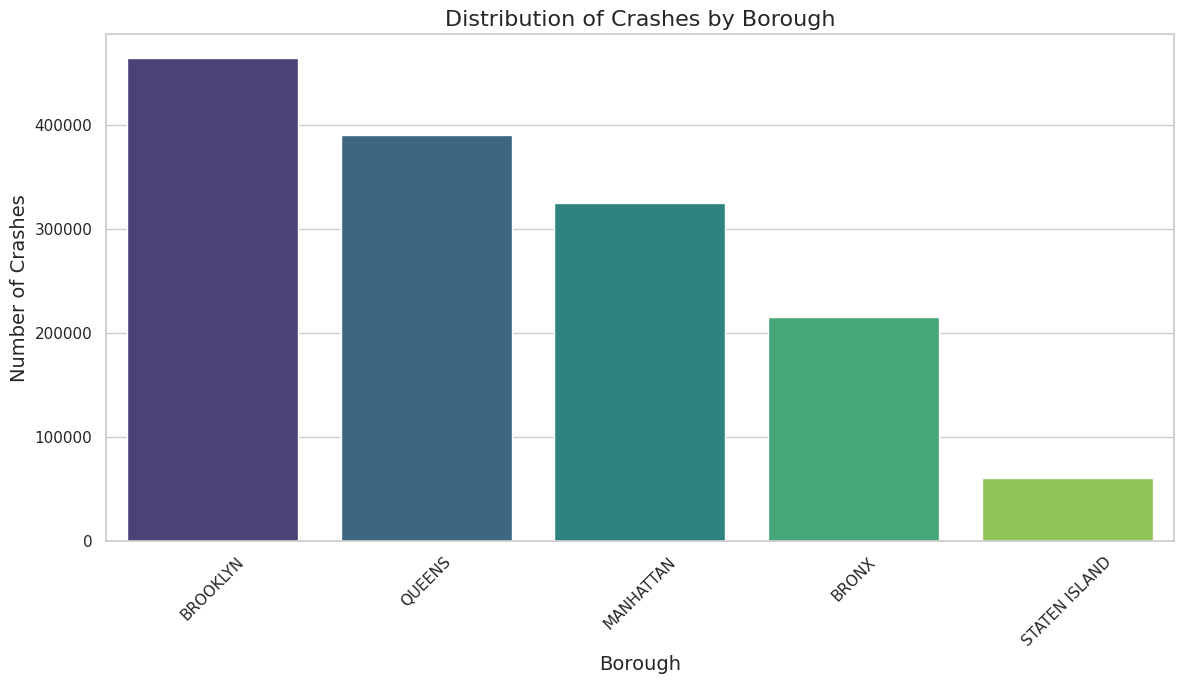

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")

# Plotting the distribution of crashes by borough
plt.figure(figsize=(12, 7))

# Find the count of unique values of BOROUGHS
borough_count = data['BOROUGH'].value_counts()

# Plotting the bar chart
sns.barplot(x=borough_count.index, y=borough_count.values, palette="viridis")
plt.title('Distribution of Crashes by Borough', fontsize=16)
plt.xlabel('Borough', fontsize=14)
plt.ylabel('Number of Crashes', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Geospatial Analysis
The main goal of this is to explore geospatial aspects of the dataset and get comfortable with regional analysis and geospatial visualizations

**Heatmaps are graphical representations that use color coding to represent different values and variables. Let's leverage a heatmap to determine the most dangerous intersections in the dataset.**

In [ ]:
import folium
from folium.plugins import HeatMap

# Drop rows with missing latitude and longitude values
data_geo = data.dropna(subset=['LATITUDE', 'LONGITUDE'])

# Create a base map
m = folium.Map(location=[40.730610, -73.935242], zoom_start=10)  # Centered around NYC

# Create a heatmap
heat_data = [[row['LATITUDE'], row['LONGITUDE']] for index, row in data_geo.iterrows()]
HeatMap(heat_data, radius=8, max_zoom=13).add_to(m)

# Save the map to an HTML file
m.save("Heatmap.html")


 **Plot crashes on the map and code them based on severity, distinguishing between crashes that resulted in injuries and those that led to fatalities. This will give us a visual representation of where severe crashes tend to occur.**

In [ ]:
import folium

# Sample a subset of the data for visualization
sample_data_severity = data_geo.sample(n=1000, random_state=42)

# Create a base map
m_severity = folium.Map(location=[40.730610, -73.935242], zoom_start=10)

# Add crashes to the map with color coding and shape coding based on severity
for index, row in sample_data_severity.iterrows():
    latitude = row['LATITUDE']
    longitude = row['LONGITUDE']

    if row['NUMBER OF PERSONS KILLED'] > 0:
        color = "red"  # Fatalities
        folium.features.RegularPolygonMarker(
          location=[latitude, longitude],
          number_of_sides=3,
          radius=5,
          color=color,
          fill=True,
          fill_color=color
        ).add_to(m_severity)

    elif row['NUMBER OF PERSONS INJURED'] > 0:
        color = "orange"  # Injuries
        folium.CircleMarker(
          location=[latitude, longitude],
          radius=5,
          color=color,
          fill=True,
          fill_color=color
       ).add_to(m_severity)
    else:
        color = "blue"  # No injuries or fatalities
        folium.features.RegularPolygonMarker(
          location=[latitude, longitude],
          number_of_sides=4,
          radius=5,
          color=color,
          fill=True,
          fill_color=color
        ).add_to(m_severity)

m_severity.save("severity.html")
